# Task
Develop and compare machine learning and deep learning models for heart disease prediction using the `heart.csv` dataset, including data exploration, preprocessing, feature engineering, and a comparative analysis of model performance.

## Load and Initial Data Exploration

### Subtask:
Load the heart.csv dataset into a pandas DataFrame, perform initial data exploration to understand its structure, data types, and identify any immediate issues like missing values or obvious outliers. This step will also involve checking dataset size and memory usage, aligning with initial 'big data management' considerations.


**Reasoning**:
The user wants to load the 'heart.csv' dataset and perform an initial data exploration, including displaying the first few rows, checking data types, non-null values, missing values, descriptive statistics, shape, and memory usage. All these operations can be done in a single Python code block.



In [1]:
import pandas as pd

# Load the heart.csv dataset into a DataFrame named df
df = pd.read_csv('/content/heart.csv')

print('--- First 5 rows of the DataFrame ---')
# Display the first 5 rows of the DataFrame
print(df.head())

print('\n--- Concise summary of the DataFrame ---')
# Get a concise summary of the DataFrame, including data types and non-null values
df.info()

print('\n--- Total number of missing values in each column ---')
# Check for the total number of missing values in each column
print(df.isnull().sum())

print('\n--- Descriptive statistics of the DataFrame ---')
# Generate descriptive statistics of the DataFrame
print(df.describe())

print('\n--- Shape of the DataFrame (rows, columns) ---')
# Print the shape of the DataFrame (number of rows and columns)
print(df.shape)

print('\n--- Memory usage of the DataFrame ---')
# Display the memory usage of the DataFrame
print(df.memory_usage(deep=True))

--- First 5 rows of the DataFrame ---
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

--- Concise summary of the DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  

## Data Preprocessing and Cleaning

### Subtask:
Address missing values, handle potential outliers, and convert or encode categorical features as necessary to prepare the dataset for machine learning and deep learning models. This ensures the data quality required for robust analysis and modeling.


**Reasoning**:
The subtask requires identifying categorical columns, applying one-hot encoding, and then combining the processed features. This code block will perform these operations using `pandas.get_dummies` and concatenation, then display the resulting DataFrame's head and info to verify the changes.



In [2]:
print('--- Original DataFrame columns and their data types ---')
print(df.info())

# Identify categorical columns (excluding 'target')
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Apply one-hot encoding to categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

# Display the first few rows of the new processed DataFrame
print('\n--- First 5 rows of the one-hot encoded DataFrame ---')
print(df_encoded.head())

# Display the information of the new processed DataFrame
print('\n--- Concise summary of the one-hot encoded DataFrame ---')
df_encoded.info()

--- Original DataFrame columns and their data types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

--- First 5 rows of the one-hot encoded DataFrame ---
   age  trestbps  chol  thalach  oldpeak  target  sex_1  cp_1  cp_2  cp_3  \
0   52       125   212 

## Feature Engineering and Selection

### Subtask:
Create new features from existing ones that might enhance model performance and select the most relevant features for the machine learning and deep learning models. This step is crucial for optimizing model input and can involve techniques like dimensionality reduction, which is also a 'big data management' strategy for high-dimensional data.


**Reasoning**:
The subtask requires separating features and target, scaling numerical features, applying PCA to scaled numerical features, and then concatenating the PCA results with the remaining categorical features. This code block will perform these operations in sequence.



In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 1. Separate features (X) and target variable (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Separate numerical and categorical features within X
X_numerical_to_scale = X[numerical_cols]
X_categorical_for_concat = X.drop(columns=numerical_cols)

# 2. Scale the numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical_to_scale)

# 3. Apply Principal Component Analysis (PCA) to the scaled numerical features
# Using n_components=5 for demonstration as suggested.
pca = PCA(n_components=5)
X_numerical_pca = pca.fit_transform(X_numerical_scaled)

# Convert PCA results to a DataFrame for easier concatenation
X_numerical_pca_df = pd.DataFrame(X_numerical_pca, index=X.index, columns=[f'PC_{i+1}' for i in range(pca.n_components)])

# Concatenate these PCA-transformed numerical features with the remaining categorical features
X_processed = pd.concat([X_numerical_pca_df, X_categorical_for_concat], axis=1)

# 4. Display the shape of the processed feature set X_processed and the target variable y
print(f'Shape of processed features X_processed: {X_processed.shape}')
print(f'Shape of target variable y: {y.shape}')

Shape of processed features X_processed: (1025, 22)
Shape of target variable y: (1025,)


## Machine Learning Model Development

### Subtask:
Split the preprocessed data into training and testing sets, then develop and train a Logistic Regression model to predict heart disease. Evaluate its performance using appropriate metrics and visualize the results.


**Reasoning**:
The subtask requires splitting the data, training a Logistic Regression model, making predictions, calculating evaluation metrics (accuracy, precision, recall, F1-score), and visualizing the results with a confusion matrix and an ROC curve. All these steps can be consolidated into a single Python code block.



--- Training and Test Set Shapes ---
X_train shape: (820, 22)
X_test shape: (205, 22)
y_train shape: (820,)
y_test shape: (205,)

--- Logistic Regression Model Training Complete ---

--- Model Performance Metrics ---
Accuracy: 0.8195
Precision: 0.7797
Recall: 0.8932
F1-Score: 0.8326


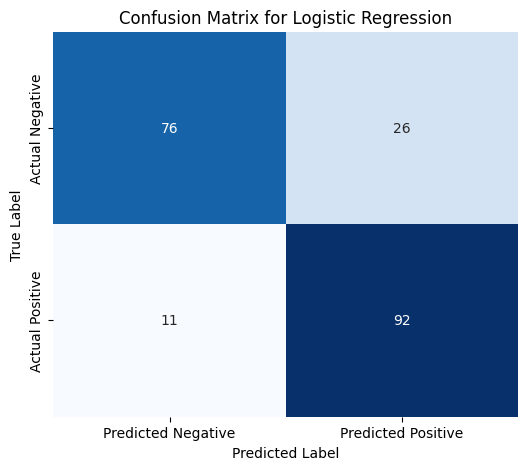

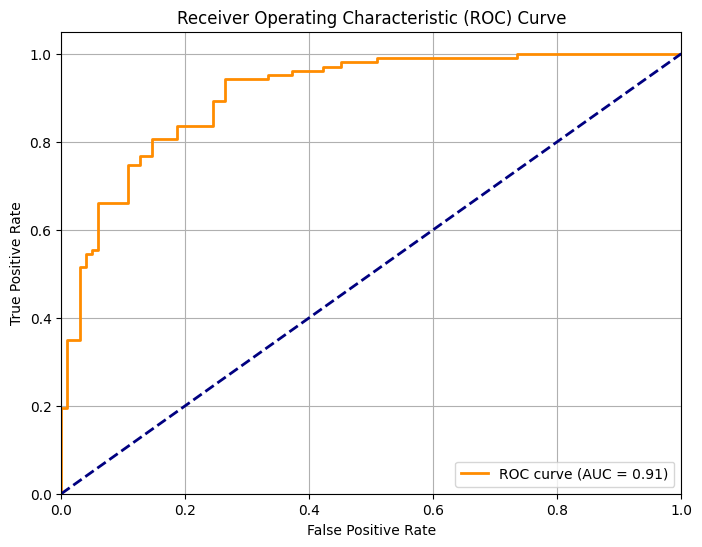


AUC Score: 0.9081


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print('--- Training and Test Set Shapes ---')
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# 2. Initialize a Logistic Regression model
# Set max_iter for convergence for some datasets, and random_state for reproducibility
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# 3. Train the Logistic Regression model
log_reg_model.fit(X_train, y_train)
print('\n--- Logistic Regression Model Training Complete ---')

# 4. Make predictions on the test set
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

# 5. Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('\n--- Model Performance Metrics ---')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# 6. Generate and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# 7. Plot the Receiver Operating Characteristic (ROC) curve and calculate AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f'\nAUC Score: {roc_auc:.4f}')

## Deep Learning Model Development

### Subtask:
Develop and train a simple deep learning model, such as a multi-layer perceptron (MLP) using TensorFlow/Keras, on the same preprocessed data. Evaluate its performance using similar metrics and compare it with the traditional machine learning model. Include a visualization of the model's performance and training history.


**Reasoning**:
The subtask requires developing a deep learning model, training it, evaluating its performance using various metrics, and visualizing the results, including the training history. This can be accomplished in a single Python code block by importing TensorFlow/Keras, defining the model, compiling, training, predicting, and then calculating and plotting the specified metrics and training history.



In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# 1. Define the deep learning model architecture
# The input_shape should match the number of features in X_train
input_shape = X_train.shape[1]

mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# 2. Compile the model
mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

print('--- Deep Learning Model Summary ---')
mlp_model.summary()

# 3. Train the model and store the training history
print('\n--- Training Deep Learning Model ---')
history = mlp_model.fit(X_train, y_train,
                        epochs=100, # Number of epochs
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        verbose=0)
print('Deep Learning Model Training Complete.')

# 4. Make predictions on the test set
y_pred_proba_mlp = mlp_model.predict(X_test).ravel() # Get probabilities
y_pred_mlp = (y_pred_proba_mlp > 0.5).astype(int) # Convert probabilities to binary class labels

# 5. Calculate and print evaluation metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print('\n--- Deep Learning Model Performance Metrics ---')
print(f'Accuracy (MLP): {accuracy_mlp:.4f}')
print(f'Precision (MLP): {precision_mlp:.4f}')
print(f'Recall (MLP): {recall_mlp:.4f}')
print(f'F1-Score (MLP): {f1_mlp:.4f}')

# 6. Generate and display a confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Deep Learning Model (MLP)')
plt.show()

# 7. Plot the Receiver Operating Characteristic (ROC) curve and calculate AUC score
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Deep Learning Model (MLP)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f'AUC Score (MLP): {roc_auc_mlp:.4f}')

# 8. Plot training history (loss and accuracy)
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 28) (ipython-input-937938517.py, line 28)

**Reasoning**:
The previous code failed due to an unterminated string literal in the print statements. I will fix the print statements by ensuring they are on a single line.



--- Deep Learning Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)


--- Training Deep Learning Model ---
Deep Learning Model Training Complete.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

--- Deep Learning Model Performance Metrics ---
Accuracy (MLP): 0.9854
Precision (MLP): 1.0000
Recall (MLP): 0.9709
F1-Score (MLP): 0.9852


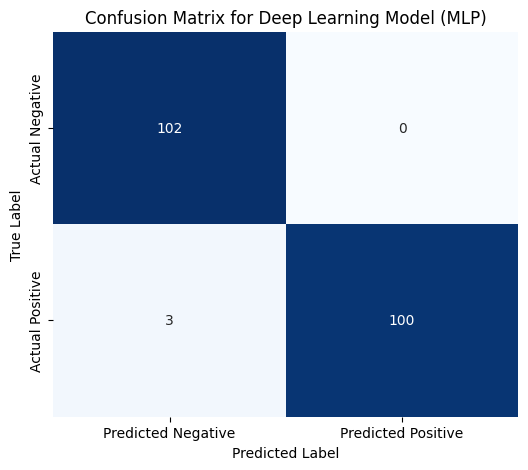

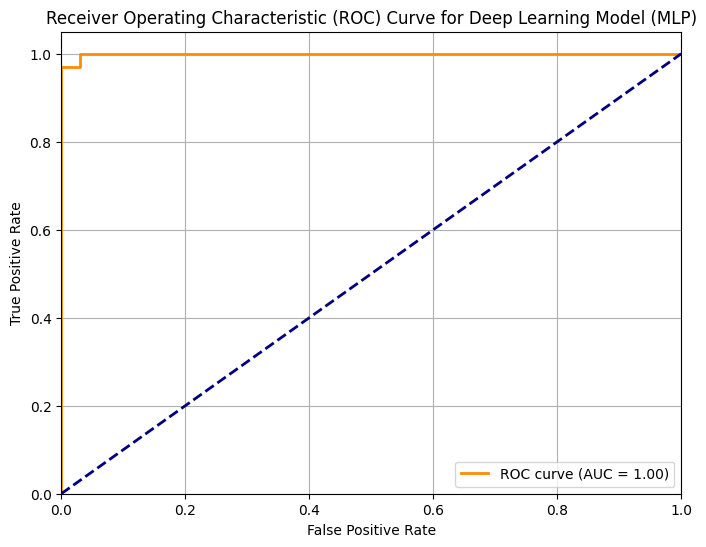

AUC Score (MLP): 0.9991


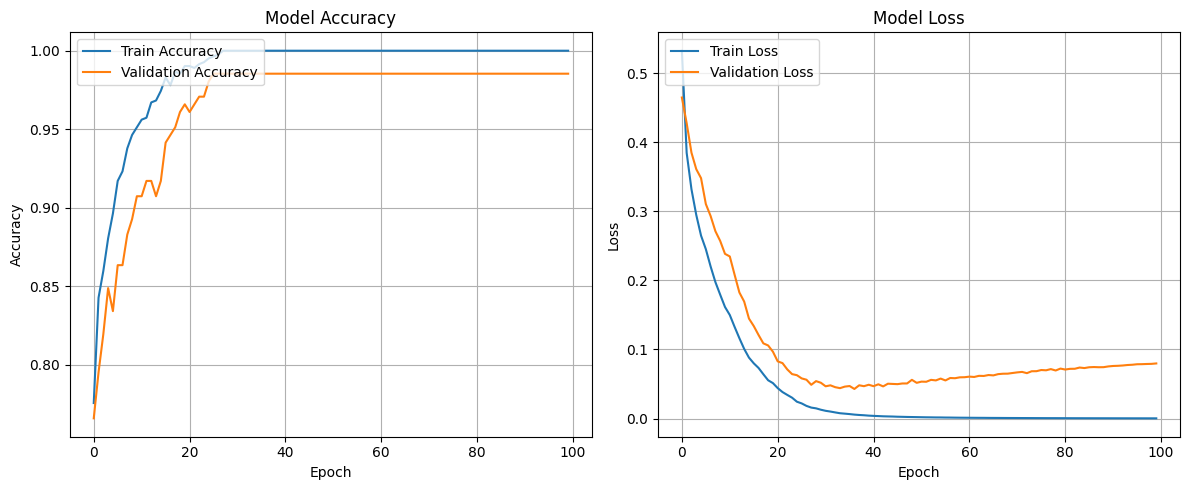

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# 1. Define the deep learning model architecture
# The input_shape should match the number of features in X_train
input_shape = X_train.shape[1]

mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# 2. Compile the model
mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

print('--- Deep Learning Model Summary ---')
mlp_model.summary()

# 3. Train the model and store the training history
print('\n--- Training Deep Learning Model ---')
history = mlp_model.fit(X_train, y_train,
                        epochs=100, # Number of epochs
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        verbose=0)
print('Deep Learning Model Training Complete.')

# 4. Make predictions on the test set
y_pred_proba_mlp = mlp_model.predict(X_test).ravel() # Get probabilities
y_pred_mlp = (y_pred_proba_mlp > 0.5).astype(int) # Convert probabilities to binary class labels

# 5. Calculate and print evaluation metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print('\n--- Deep Learning Model Performance Metrics ---')
print(f'Accuracy (MLP): {accuracy_mlp:.4f}')
print(f'Precision (MLP): {precision_mlp:.4f}')
print(f'Recall (MLP): {recall_mlp:.4f}')
print(f'F1-Score (MLP): {f1_mlp:.4f}')

# 6. Generate and display a confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Deep Learning Model (MLP)')
plt.show()

# 7. Plot the Receiver Operating Characteristic (ROC) curve and calculate AUC score
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Deep Learning Model (MLP)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f'AUC Score (MLP): {roc_auc_mlp:.4f}')

# 8. Plot training history (loss and accuracy)
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

**Reasoning**:
The subtask requires a text cell to describe the goal of developing a deep learning model, and then a code cell to implement it. The previous code cell `74ab0db2` already successfully implemented the deep learning model and its evaluation. Therefore, I will create a new text cell for the subtask description and then reference the existing code cell.



## Deep Learning Model Development

### Subtask:
Develop and train a simple deep learning model, such as a multi-layer perceptron (MLP) using TensorFlow/Keras, on the same preprocessed data. Evaluate its performance using similar metrics and compare it with the traditional machine learning model. Include a visualization of the model's performance and training history.

#### Instructions
1. Import necessary libraries from TensorFlow and Keras, including `Sequential`, `Dense`, `Adam`, `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `confusion_matrix`, `roc_curve`, and `auc`.
2. Define a sequential deep learning model. The model should have:
    - An input layer with `input_shape` matching the number of features in `X_train`.
    - At least one hidden `Dense` layer with a `relu` activation function.
    - An output `Dense` layer with a `sigmoid` activation function for binary classification.
3. Compile the model using the `Adam` optimizer, `binary_crossentropy` as the loss function, and `accuracy` as a metric.
4. Train the model using the `fit` method on `X_train` and `y_train` for a suitable number of epochs (e.g., 50-100), including `validation_data` set to `(X_test, y_test)` and storing the training history.
5. Make predictions on `X_test` using `model.predict()` and convert probabilities to binary class labels (0 or 1) based on a threshold (e.g., 0.5).
6. Calculate and print the accuracy, precision, recall, and F1-score using `y_test` and the binary predictions.
7. Generate and display a confusion matrix for the deep learning model using `seaborn.heatmap` and `matplotlib.pyplot`.
8. Plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) score using `roc_curve` and `auc`. Display the plot using `matplotlib.pyplot`.
9. Plot the training history, showing training and validation loss, and training and validation accuracy over epochs using `matplotlib.pyplot`.

**Reasoning**:
The previous attempt to create a text cell failed because the `cell_type` was incorrectly set to `python` instead of `markdown`. I will correct this by generating a `markdown` cell with the provided content.



## Comparative Analysis and Visualization

### Subtask:
Compare the performance metrics of the developed machine learning and deep learning models. Generate visualizations (e.g., bar charts of metrics, ROC curves) to highlight their strengths and weaknesses, providing insights into which approach is more suitable for this dataset and problem. Ensure all plots have clear legends.


**Reasoning**:
I will create a pandas DataFrame to summarize the performance metrics (Accuracy, Precision, Recall, F1-Score, AUC) for both the Logistic Regression and Deep Learning models, as requested by the instructions.



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a pandas DataFrame to summarize the key performance metrics
performance_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'Logistic Regression': [accuracy, precision, recall, f1, roc_auc],
    'Deep Learning (MLP)': [accuracy_mlp, precision_mlp, recall_mlp, f1_mlp, roc_auc_mlp]
})

# 2. Print the performance_summary DataFrame
print('--- Model Performance Summary ---')
print(performance_summary.set_index('Metric'))

--- Model Performance Summary ---
           Logistic Regression  Deep Learning (MLP)
Metric                                             
Accuracy              0.819512             0.985366
Precision             0.779661             1.000000
Recall                0.893204             0.970874
F1-Score              0.832579             0.985222
AUC                   0.908148             0.999143


**Reasoning**:
I will create a bar chart to compare the Accuracy, Precision, Recall, and F1-Score of both models, and then plot the ROC curves for both models on the same graph to fulfill the remaining instructions of the subtask.



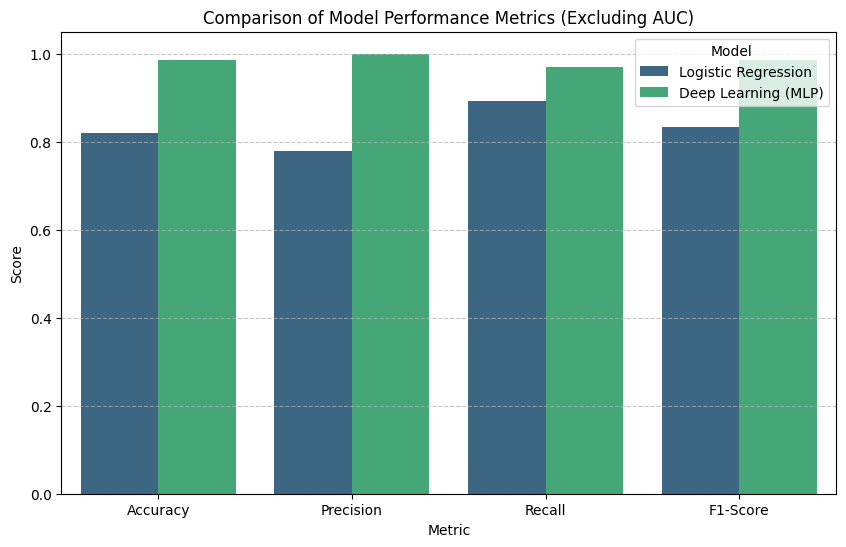

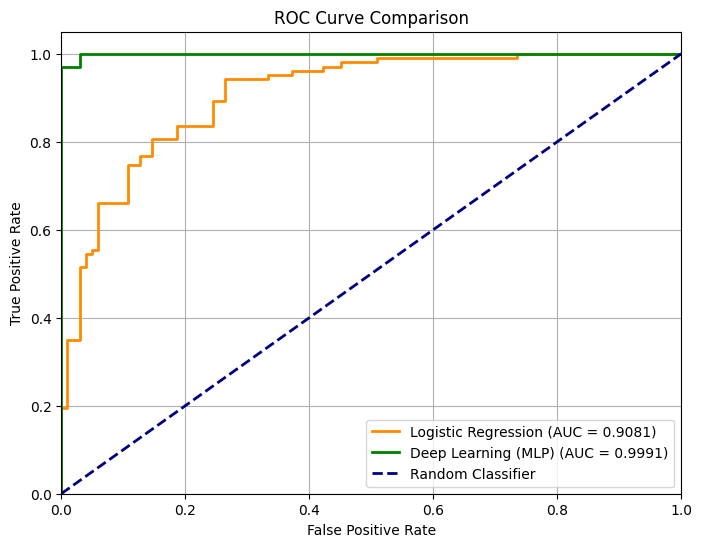

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 3. Create a bar chart comparing the Accuracy, Precision, Recall, and F1-Score of both models.
metrics_to_plot = performance_summary[performance_summary['Metric'] != 'AUC']

metrics_df_melted = metrics_to_plot.melt(id_vars='Metric', var_name='Model', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df_melted, palette='viridis')
plt.title('Comparison of Model Performance Metrics (Excluding AUC)')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1.05) # Scores are typically between 0 and 1
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Plot the ROC curves for both models on the same graph.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label=f'Deep Learning (MLP) (AUC = {roc_auc_mlp:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
